<a href="https://colab.research.google.com/github/Madhu2s6361/Cardiovascular-Disease-Prediction/blob/main/Project_1_Cardiovascular_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 1 : Cardiovascular Disease Prediction


**Cardiovascular Disease:
Definition: It is the application of machine learning (ML) algorithms to analyze patient health data (such as age, cholesterol, blood pressure, glucose levels, lifestyle habits, etc.) to predict the risk or presence of cardiovascular diseases (CVDs) like heart attack, stroke, or heart failure.

Why it’s important

Cardiovascular diseases are the leading cause of death worldwide.

Early detection can save lives by enabling timely intervention.

Traditional methods rely on manual interpretation (ECG, blood tests, clinical judgment), while ML can process large, complex datasets and find hidden patterns that humans may miss.

Cardiovascular Diseases: https://bigapollospectra.com/news/cardiovascular-disease-types-causes-and-symptoms

****Concept

Input (Features): age, gender, cholesterol, blood pressure, smoking, BMI, glucose, etc.

Target (Label): cardio (1 = has cardiovascular disease; 0 = no disease).

****Approach:

Perform EDA → clean + explore dataset.

Train/Test split.

Scale features.

Apply ML model (Logistic Regression, RandomForest, etc.).

Evaluate (Accuracy, Confusion Matrix, ROC, Precision, F1 score, classification report etc...)


• Perform data pre-processing operations.
• As a part of data analysis and visualizations draw all the possible plots to provide essential informations and to derive some meaningful insights.

• Show your correlation matrix of features according to the datasets.

• Find out accuracy levels of various machine learning techniques such as
Support Vector Machines (SVM), K-Nearest Neighbor (KNN),
Decision Trees (DT) ,
Logistic Regression (LR) and
Random Forest (RF).

• Build your Machine learning model for heart disease detection according to the result.

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [58]:
df= pd.read_csv("cardio.csv")

In [59]:
df

,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0,0;18393;2;168;62.0;110;80;1;1;0;0;1;0
1,1;20228;1;156;85.0;140;90;3;1;0;0;1;1
2,2;18857;1;165;64.0;130;70;3;1;0;0;0;1
3,3;17623;2;169;82.0;150;100;1;1;0;0;1;1
4,4;17474;1;156;56.0;100;60;1;1;0;0;0;0
...,...
49956,71303;18893;2;170;85.0;130;80;1;1;0;0;1;1
49957,71304;21323;1;158;78.0;140;90;1;1;0;0;1;0
49958,71308;16127;2;168;72.0;120;80;1;2;1;0;1;0
49959,71309;17579;1;163;45.0;120;80;1;1;0;0;1;0


In [60]:
df= pd.read_csv("cardio.csv",sep=";") # The separator (delimiter) between columns in the CSV file is a semicolon (;), not a comma (,).

In [61]:
df.head() # View the first 5 rowsof the DataFrame.

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0.0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1.0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1.0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1.0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0.0


In [62]:
df.tail() # View the last 5 rowsof the DataFrame.

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
49956,71303,18893,2,170,85.0,130,80,1,1,0,0,1,1.0
49957,71304,21323,1,158,78.0,140,90,1,1,0,0,1,0.0
49958,71308,16127,2,168,72.0,120,80,1,2,1,0,1,0.0
49959,71309,17579,1,163,45.0,120,80,1,1,0,0,1,0.0
49960,71310,19808,1,152,78.0,150,90,3,1,0,0,0,NaN


In [63]:
df.sample() # View the random 5rows of the DataFrame.

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
29116,41599,19777,1,169,72.0,110,70,1,1,0,0,1,0.0


In [64]:
df.shape # Get the dimensions ofthe DataFrame.

(49961, 13)

In [65]:
df.dtypes # Check data types ofcolumns.

,0
id,int64
age,int64
gender,int64
height,int64
weight,float64
ap_hi,int64
ap_lo,int64
cholesterol,int64
gluc,int64
smoke,int64


In [66]:
df.index # Display the indexrange.

RangeIndex(start=0, stop=49961, step=1)

In [67]:
df.info() # Get a concise summaryof the DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49961 entries, 0 to 49960
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           49961 non-null  int64  
 1   age          49961 non-null  int64  
 2   gender       49961 non-null  int64  
 3   height       49961 non-null  int64  
 4   weight       49961 non-null  float64
 5   ap_hi        49961 non-null  int64  
 6   ap_lo        49961 non-null  int64  
 7   cholesterol  49961 non-null  int64  
 8   gluc         49961 non-null  int64  
 9   smoke        49961 non-null  int64  
 10  alco         49961 non-null  int64  
 11  active       49961 non-null  int64  
 12  cardio       49960 non-null  float64
dtypes: float64(2), int64(11)
memory usage: 5.0 MB


In [68]:
df.describe() # Summarystatistics for numericalcolumns.

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,49961.000000,49961.000000,49961.000000,49961.000000,49961.000000,49961.000000,49961.000000,49961.000000,49961.000000,49961.000000,49961.000000,49961.000000,49960.000000
mean,35676.161566,19464.684094,1.346971,164.366166,74.230610,128.747183,96.972118,1.363504,1.225856,0.088209,0.053402,0.802626,0.499039
std,20609.537461,2469.041025,0.476011,8.190134,14.327859,154.515534,200.225599,0.677197,0.572023,0.283601,0.224835,0.398021,0.500004
min,0.000000,10798.000000,1.000000,55.000000,11.000000,-150.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17836.000000,17662.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,35682.000000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,53508.000000,21321.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,71310.000000,23690.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
df.columns # List column names.

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [70]:
# Cleaning Data

df.isnull() # Check for nullvalues.

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49956,False,False,False,False,False,False,False,False,False,False,False,False,False
49957,False,False,False,False,False,False,False,False,False,False,False,False,False
49958,False,False,False,False,False,False,False,False,False,False,False,False,False
49959,False,False,False,False,False,False,False,False,False,False,False,False,False


In [71]:
df.notnull() # Check for non-nullvalues.

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49956,True,True,True,True,True,True,True,True,True,True,True,True,True
49957,True,True,True,True,True,True,True,True,True,True,True,True,True
49958,True,True,True,True,True,True,True,True,True,True,True,True,True
49959,True,True,True,True,True,True,True,True,True,True,True,True,True


In [72]:
df["age"]= (df["age"]/365).astype(int)
df["age"]

,age
0,50
1,55
2,51
3,48
4,47
...,...
49956,51
49957,58
49958,44
49959,48


In [73]:
df["bmi"]= df["weight"]/ ((df["height"]/100 ** 2))
df["bmi"]

,bmi
0,3690.476190
1,5448.717949
2,3878.787879
3,4852.071006
4,3589.743590
...,...
49956,5000.000000
49957,4936.708861
49958,4285.714286
49959,2760.736196


In [74]:
# Remove abnormal values (data cleaning)
# ap_hi: systolic_bp
# ap_lo: diastolic_bp
df = df[(df["ap_hi"] >= df["ap_lo"]) & (df["ap_hi"] <= 250) & (df["ap_lo"] >= 40)]

In [75]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0.0,3690.476190
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1.0,5448.717949
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1.0,3878.787879
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1.0,4852.071006
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0.0,3589.743590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49956,71303,51,2,170,85.0,130,80,1,1,0,0,1,1.0,5000.000000
49957,71304,58,1,158,78.0,140,90,1,1,0,0,1,0.0,4936.708861
49958,71308,44,2,168,72.0,120,80,1,2,1,0,1,0.0,4285.714286
49959,71309,48,1,163,45.0,120,80,1,1,0,0,1,0.0,2760.736196


In [76]:
# Step 1: Remove missing values
df = df.dropna(subset=['cardio'])

In [77]:
# Step 2: Keep only valid entries (0 or 1)
df = df[df['cardio'].isin([0, 1, 0.0, 1.0])]

In [78]:
# Step 3: Convert to integer type
df['cardio'] = df['cardio'].astype(int)

In [79]:
df['cardio']

,cardio
0,0
1,1
2,1
3,1
4,0
...,...
49955,1
49956,1
49957,0
49958,0


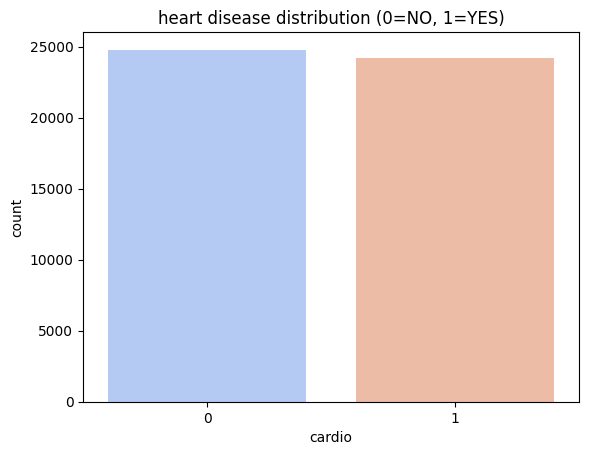

In [80]:
# Distribution of target variable
sns.countplot(x="cardio", data=df, palette="coolwarm")
plt.title("heart disease distribution (0=NO, 1=YES)")
plt.show()

In [81]:
gender_cardio= df.groupby("gender")["cardio"].mean().reset_index()
gender_cardio

,gender,cardio
0,1,0.493120
1,2,0.496226


In [82]:
display(gender_cardio['cardio'])

,cardio
0,0.493120
1,0.496226


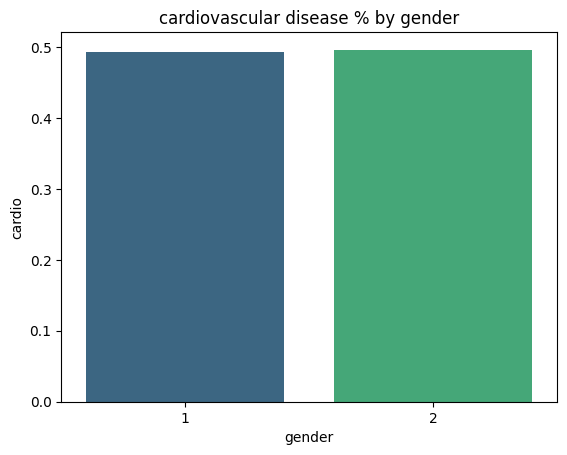

In [83]:
sns.barplot(x="gender", y="cardio", data=gender_cardio, palette="viridis")
plt.title("cardiovascular disease % by gender")
plt.show()

In [84]:
age_chol= df.groupby("age")["cholesterol"].mean().reset_index()

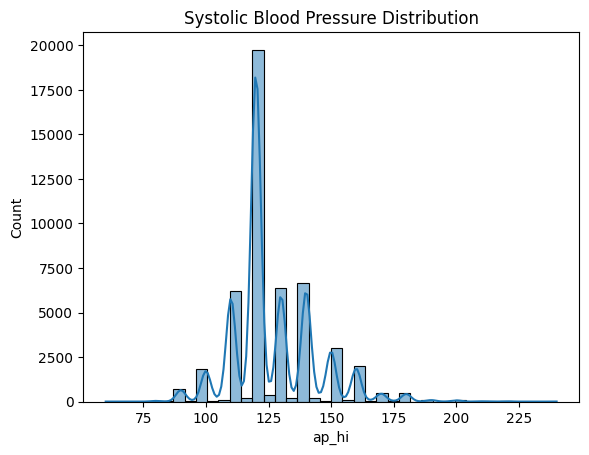

In [88]:
# Systolic Blood Pressure distribution [ap_hi: systolic_bp]
sns.histplot(df['ap_hi'], kde=True, bins=40)
plt.title('Systolic Blood Pressure Distribution')
plt.show()

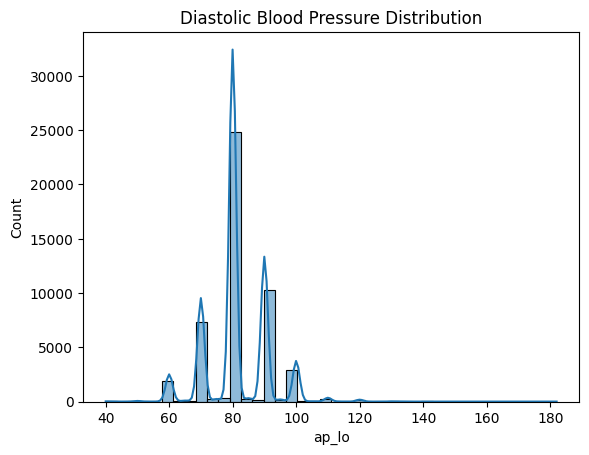

In [91]:
# Diastolic Blood Pressure distribution [ap_lo: diastolic_bp]
sns.histplot(df['ap_lo'], kde=True, bins=40)
plt.title('Diastolic Blood Pressure Distribution')
plt.show()

In [85]:
prob = 0.496727  # example probability
if prob >= 0.5:
    print(f"Risk Detected! ({prob*100:.2f}% chance of heart disease)")
else:
    print(f"No significant risk. ({prob*100:.2f}% chance of heart disease)")

No significant risk. (49.67% chance of heart disease)


In [94]:
# Average cholesterol by gender
# Average cholesterol by age
df.groupby('gender')['cholesterol'].mean()

,cholesterol
gender,
1,1.379957
2,1.326336


In [95]:
df.groupby('age')['cholesterol'].mean()

,cholesterol
age,
29,1.000000
39,1.187643
40,1.164613
41,1.210206
42,1.176768
43,1.265920
44,1.193365
45,1.242177
46,1.233653


In [96]:
# Count of patients by cardio status 0=NO, 1=Yes
df.groupby('cardio').size()

,0
cardio,
0,24789
1,24220


In [97]:
df.groupby('cardio')[['ap_hi', 'ap_lo']].mean()


,ap_hi,ap_lo
cardio,,
0,119.564807,78.125298
1,133.945912,84.573163


In [98]:
df.groupby(['gender', 'cardio'])['cholesterol'].mean()


gender  cardio
1       0         1.224486
        1         1.539766
2       0         1.191502
        1         1.463220
Name: cholesterol, dtype: float64

In [99]:
df.groupby('cardio')['age'].agg(['mean', 'min', 'max'])


,mean,min,max
cardio,,,
0,51.227359,29,64
1,54.442898,39,64


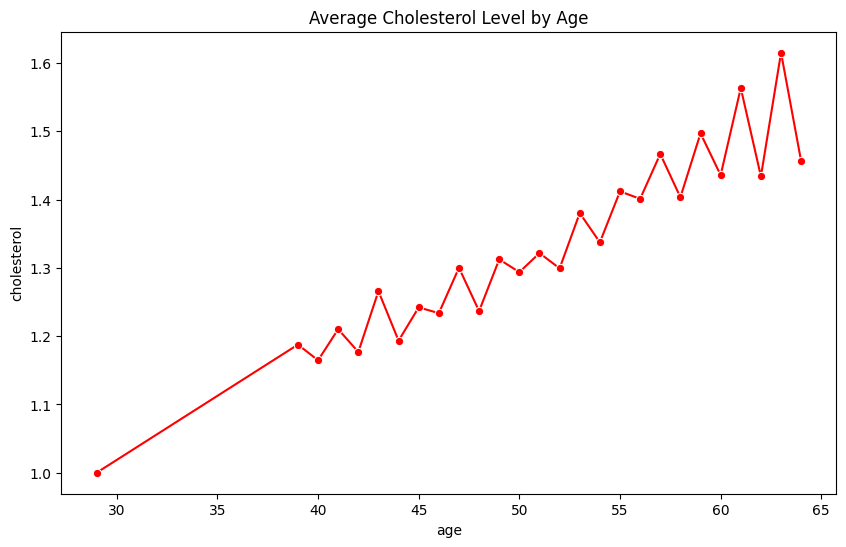

In [102]:
age_chol = df.groupby('age')['cholesterol'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=age_chol, x='age', y='cholesterol', marker='o', color='red')
plt.title('Average Cholesterol Level by Age')
plt.show()


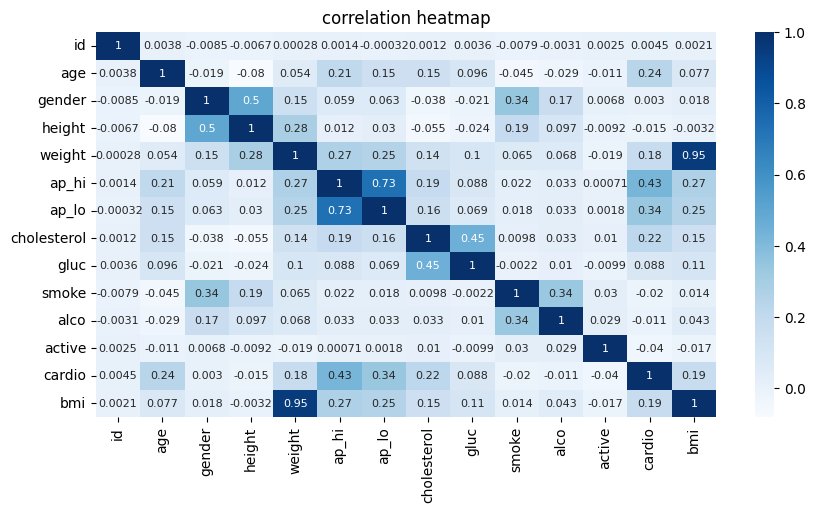

In [103]:
# Correlation matrix
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap="Blues", annot_kws={"size": 8})
plt.title("correlation heatmap")
plt.show()

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [111]:
# Feature Selection and Train-Test Split
x = df.drop(columns=['cardio'])
y = df['cardio']

In [112]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [113]:
# Feature scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

 the dataset is divided into input features (X) and output labels (y).

Split data → 80% training, 20% testing.

Used StandardScaler to normalize values (important for ML models like SVM, KNN).

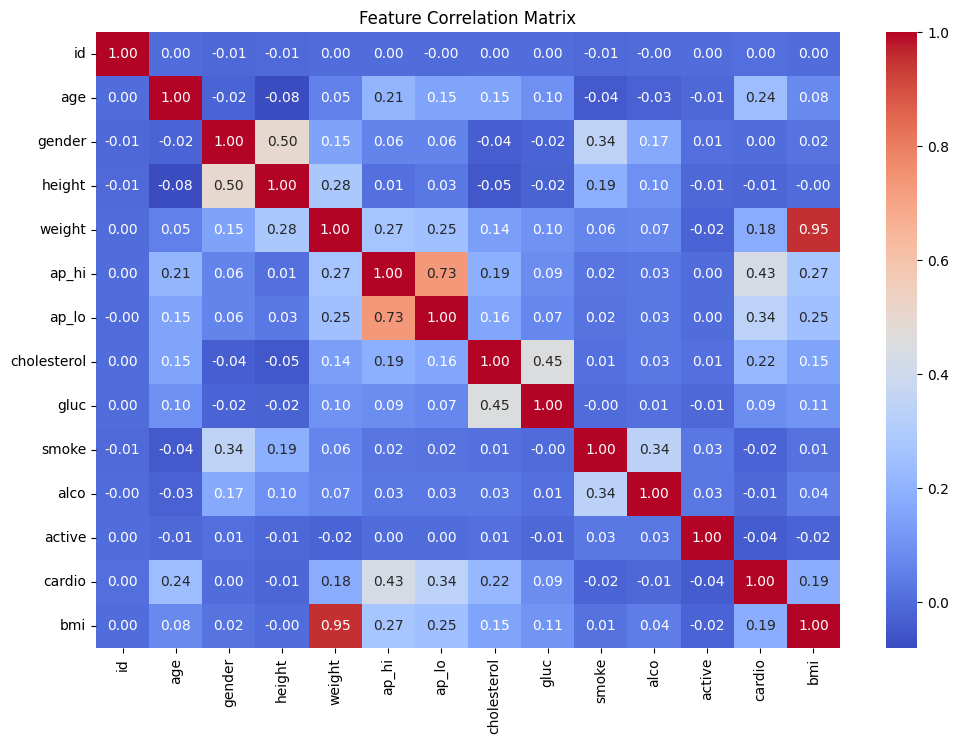

In [118]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()